In [ ]:
# %matplotlib notebook
# does not work in colab
# ! pip install ffmpeg

In [ ]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
# import matplotlib
# matplotlib.use("TkAgg")

In [ ]:
from celluloid import Camera
from matplotlib import animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation, FFMpegWriter

## $ f_{a}(x) = \sum\limits_{k=1}^{\infty}\frac{\sin(\pi k^{a} x)}{\pi k^{a}} $

Weierstrass Function: [Wolfram](https://mathworld.wolfram.com/WeierstrassFunction.html)

In [ ]:
def Weierstrass_Sin(x, a):
  sum_ = 0
  for k in range(1,100):
    t = np.pi * (k**a)
    sum_ += np.sin(t*x) / t

  return sum_

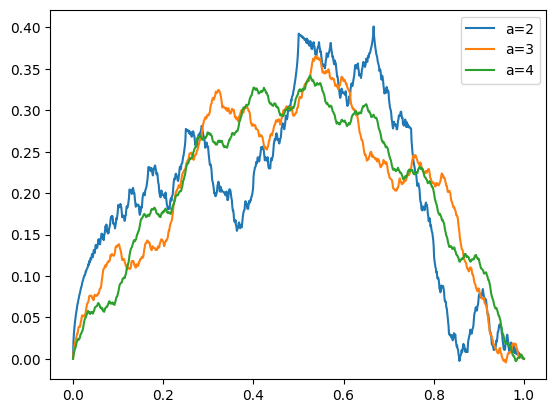

In [18]:
x = np.linspace(0,1,1000)
y = Weierstrass_Sin(x, 2)
plt.plot(x,y, label='a=2')
y = Weierstrass_Sin(x, 3)
plt.plot(x,y, label='a=3')
y = Weierstrass_Sin(x, 4)
plt.plot(x,y, label='a=4')
plt.legend()
plt.show()

### using FuncAnimation

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
axs = plt.axes(xlim =(0, 1), ylim =(0, 0.5))
line, = axs.plot([], [])
text = axs.text(0.8,0.4, 'a=')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i, frames):
  start1, end1 = 0, frames-1
  start2, end2 = 1, 5
  ratio = (end2-start2)/(end1-start1)
  t = ratio*i + (start2-start1*ratio)

  x = np.linspace(0,1,1000)
  y = Weierstrass_Sin(x, t)
  line.set_data(x, y)
  text.set_text(f'a={t:.2f}')
  return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
frames = 900
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tqdm(range(frames)), fargs=(frames,), blit=True)

anim.save('Weierstrass.gif', writer=animation.PillowWriter(fps=30))

plt.show()

In [ ]:
frames = 50
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tqdm(range(frames)), fargs=(frames,), blit=True)
HTML(anim.to_jshtml())

### using Celluloid

In [26]:
def animate(frames):
  fig = plt.figure()
  plt.ylim(0,0.5)
  camera = Camera(fig)
  
  for t in tqdm(np.linspace(1,5,frames)):
    x = np.linspace(0,1,1000)
    y = Weierstrass_Sin(x, t)
    plt.plot(x,y, c='#1f77b4')
    plt.text(0.8,0.4,f'a={t:.2f}')
    camera.snap()
    
  return camera

camera = animate(1000)
anim = camera.animate()
anim.save('Weierstrass.gif', writer=animation.PillowWriter(fps=30))
plt.show()

In [ ]:
camera = animate(50)
anim = camera.animate()
plt.show()

In [28]:
HTML(anim.to_jshtml(default_mode='reflect'))

## $ f_{a,b}(x) = \sum\limits_{n=0}^{\infty} a^{n} \cos(b^{n} \pi x) $

Weierstrass Function: [Wikipedia](https://en.wikipedia.org/wiki/Weierstrass_function)

In [12]:
def Weierstrass_Cos(x, a, b):
  sum_ = 0
  for k in range(0,100):
    t = np.pi * (b**k)
    sum_ += (a**k) * np.cos(t*x)

  return sum_

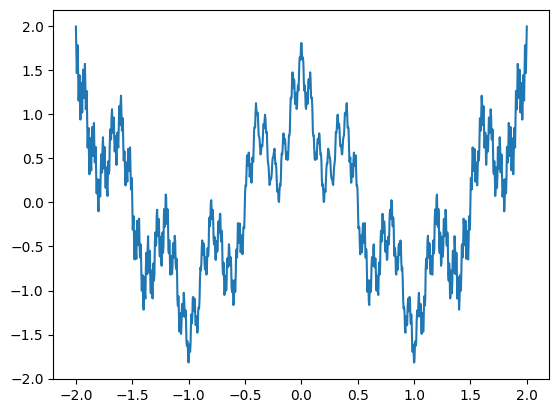

In [14]:
x = np.linspace(-2,2,1000)
y = Weierstrass_Cos(x, 0.5, 5)
plt.plot(x,y)
plt.show()

In [15]:
def animate(frames):
  fig = plt.figure()
  plt.ylim(-2,2)
  camera = Camera(fig)
  
  for t in tqdm(np.linspace(1,7,frames)):
    x = np.linspace(-2,2,1000)
    y = Weierstrass_Cos(x, 0.5, t)
    plt.plot(x,y, c='#1f77b4')
    plt.text(0.8,1.2,f'a=0.5')
    plt.text(0.8,1.0,f'b={t:.2f}')
    camera.snap()
    
  return camera

In [ ]:
camera = animate(50)
anim = camera.animate()
plt.show()

In [22]:
HTML(anim.to_jshtml(default_mode='reflect'))

### Slider widget

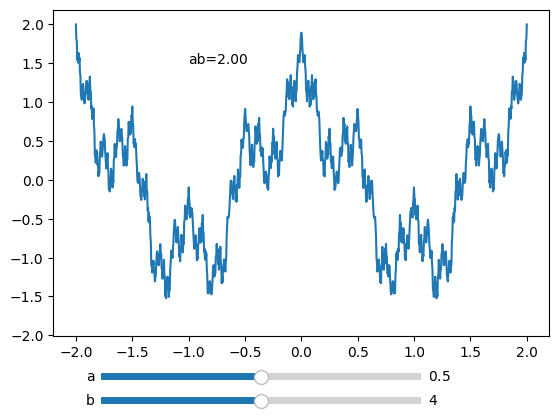

In [19]:
from matplotlib.widgets import Slider, Button

x = np.linspace(-2,2,1000)
y = Weierstrass_Cos(x, 0.5, 5)
line, = plt.plot(x,y)
text = plt.text(-1,1.5, 'ab')

ax_aSlid = plt.axes([0.2, 0.1, 0.5, 0.03])
a_slider = Slider(ax_aSlid, 'a', 0.0, 1, 0.5)

ax_bSlid = plt.axes([0.2, 0.05, 0.5, 0.03])
b_slider = Slider(ax_bSlid, 'b', 1.0, 7.0, 4.0)


def update(val):
  a = a_slider.val
  b = b_slider.val
  y = Weierstrass_Cos(x, a, b)
  line.set_ydata(y)
  text.set_text(f'ab={a*b:.2f}')


# Call update function when slider value is changed
update(None)
a_slider.on_changed(update)
b_slider.on_changed(update)

  
plt.subplots_adjust(bottom=0.2)
plt.show()